### "Банки — анализ оттока клиентов"

В нашем распоряжении датасет "/datasets/bank_scrooge.csv", который содержит данные о клиентах банка "Метанпром". Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. В банке последнее время драматически повысился отток, это начинает становиться проблемой, которая угрожает существованию банка. Менеджер отдела маркетинга банка "Метанпром" обратился с запросом на выявление сегментов отточных клиентов, чтобы на основе сегментации применить различные маркетинговые иструменты по удержанию существующих клиентов. Предыдущее исследование устарело и по нему сейчас не ясно, в чём сейчас заключается проблема и как её можно решать.

### Цели исследования

Необходимо проанализировать клиентов банка "Метанпром", максимально эффективно выделить сегменты отточных клиентов и составить рекомендации по их удержанию.

### Задачи исследования

 - изучить общую информацию в данных и выполнить предобработку;
 - провести исследовательский анализ данных с точки зрения оттока;
 - сформулировать и проверить статистические гипотезы;
 - обобщить признаки отточности, сформулировать подходящие сегменты и приоритезировать их;
 - сформулировать рекомендации для отдела маркетинга, исходя из ограниченности ресурсов для их осуществления.

### Описание данных

Данные для исследования находятся в файле "bank_scrooge.csv":
    
    • USERID — идентификатор пользователя;
    • score — баллы кредитного скоринга;
    • city — город;
    • gender — пол;
    • age — возраст;
    • equity — количество баллов собственности;
    • balance — баланс на счёте;
    • products — количество продуктов, которыми пользуется клиент;
    • credit_card — есть ли кредитная карта;
    • last_activity — активный клиент;
    • EST_SALARY — оценочный доход клиента;
    • сhurn — признак оттока.

### Загрузка данных и изучение общей информации

In [1]:
#подключим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import plotly.express as px
from statistics import mode

In [2]:
# настройка отображения
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 150

In [3]:
#загружаем данные из CSV-файла в переменную датафрейма
df = pd.read_csv('https://code.s3.yandex.net/datasets//bank_scrooge.csv')

In [4]:
# выведем первые и последние 5 строк датафрейма
display(df.head(5), df.tail(5))

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1


,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
9995,120553,814.00,Рыбинск,М,27.00,1,"78,144.65",1,0,1,"18,943.64",0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,"196,898.29",0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,"108,905.09",0
9998,148700,777.00,Ярославль,Ж,68.00,3,"865,457.97",3,0,1,"86,874.90",0
9999,96267,828.00,Рыбинск,Ж,58.00,3,"1,180,886.70",4,0,1,"21,422.37",0


In [5]:
#выведем общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
#посмотрим основные характеристики датафрейма
df.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,"10,000.00","10,000.00","9,974.00","10,000.00","7,705.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"171,814.71",848.70,42.73,2.63,"827,794.31",1.87,0.68,0.52,"147,866.89",0.18
std,"33,708.24",65.45,12.18,1.98,"1,980,614.15",0.79,0.47,0.50,"139,388.51",0.39
min,"94,561.00",642.00,18.00,0.00,0.00,0.00,0.00,0.00,"2,546.30",0.00
25%,"142,810.25",802.00,33.00,0.00,"295,554.16",1.00,0.00,0.00,"75,251.90",0.00
50%,"172,728.00",853.00,40.00,3.00,"524,272.20",2.00,1.00,1.00,"119,658.10",0.00
75%,"201,261.75",900.00,51.00,4.00,"980,705.85",2.00,1.00,1.00,"174,500.54",0.00
max,"229,145.00","1,000.00",86.00,9.00,"119,113,552.01",5.00,1.00,1.00,"1,395,064.45",1.00


In [7]:
# проверим уникальные значения в столбце "city"
df['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [8]:
# проверим уникальные значения в столбце "gender"
df['gender'].unique()

array(['Ж', 'М'], dtype=object)

**Выводы:**

   - датафрейм содержит 1000 строк данных в 12 столбцах;
   - названия столбцов не выдержаны в едином стиле snake_case: столбцы "USERID" и "EST_SALARY" необходимо переименовать;
   - бОльшая часть данных представлена типом int;
   - столбец с даными о возрасте ("age") необходимо привести к типу int;
   - в столбцах "age" и " balance" есть пропуски;
   - для анализа корреляции необходимо закодировать столбцы "city" и "gender";
   - баллы кредитного скоринга ("score") лежат в диапазоне от 642 до 1000;
   - возраст клиентов банка ("age") лежит в диапазоне от 18 до 86 лет;
   - количество баллов собственности ("equity") находится в границах от 0 до 9;
   - максимальное количество продуктов, которыми пользуется клиент равно пяти, минимальное значение ноль явно ошибочно, т.к. как только человек становится клиентом банка, он сразу же начинает пользоваться каким-либо продуктом банка (дебетовая или кредитная карта, депозит и прочее);
   - уникальные значения столбцов "city" и "gender" соотвествуют описанию.

### Подготовка данных к исследованию

In [9]:
#переименуем названия двух столбцов и проверим результат:
df = df.rename(columns = {'USERID':'user_id', 'EST_SALARY':'est_salary'})
df

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,"78,144.65",1,0,1,"18,943.64",0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,"196,898.29",0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,"108,905.09",0
9998,148700,777.00,Ярославль,Ж,68.00,3,"865,457.97",3,0,1,"86,874.90",0


In [10]:
#проверим датафрейм на наличие явных дубликатов
print ('Количество явных дубликатов равно', df.duplicated().sum())

Количество явных дубликатов равно 0


In [11]:
#проверим датафрейм на наличие неявных дубликатов
df.duplicated(subset='user_id', keep=False).sum()

146

In [12]:
df[df.duplicated(subset=['user_id'], keep=False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825.00,Ярославль,Ж,38.00,4,"458,145.40",2,1,1,"68,085.48",0
58,164676,860.00,Ярославль,М,37.00,5,"648,594.03",2,1,1,"213,586.86",1
150,185748,850.00,Рыбинск,М,36.00,5,"1,203,376.67",2,0,1,"89,401.82",1
161,197364,928.00,Рыбинск,Ж,53.00,6,"1,347,183.86",2,0,1,"168,189.49",1
231,190253,823.00,Рыбинск,М,37.00,4,"373,348.39",2,0,1,"131,947.92",1
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758.00,Рыбинск,Ж,36.00,0,"73,574.07",2,0,1,"79,963.59",0
9785,168998,895.00,Рыбинск,М,44.00,0,"282,653.53",3,0,0,"255,296.47",0
9819,140934,832.00,Рыбинск,Ж,NaN,3,"385,763.16",2,0,1,"59,651.35",0
9880,217412,886.00,Ярославль,Ж,35.00,3,"1,026,172.14",2,1,0,"53,099.16",0


In [13]:
df.duplicated(subset=['user_id', 'gender', 'age'], keep=False).sum()

4

In [14]:
df[df.duplicated(subset=['user_id', 'gender', 'age'], keep=False)]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3274,155765,863.00,Ярославль,М,30.00,5,"1,036,114.50",5,1,1,"150,744.50",1
5197,155765,923.00,Рыбинск,М,30.00,0,NaN,1,1,1,"120,296.60",0
8205,227795,840.00,Рыбинск,М,34.00,2,"350,768.03",1,1,0,"102,036.14",1
8497,227795,839.00,Ярославль,М,34.00,2,"326,593.14",2,1,0,"103,314.92",0


In [15]:
df.duplicated(subset=['user_id', 'city'], keep=False).sum()

0

In [16]:
df.duplicated(subset=['user_id', 'gender', 'age', 'city'], keep=False).sum()

0

При проверке на неявные дубликаты обнаружено 146 одинаковых значений по полю "user_id", а также 4 дубликата с совпадениями по столбцам "user_id", "gender", "age". Однако дальнейшая проверка показала, что все пользователи из разных городов. Возможно задвоение произошло из-за слияния выгрузок данных по разным филиалам банка, в связи с чем найденные дубликаты необходимо оставить в датафрейме.  

In [17]:
#проверим датафрейм на наличие пропусков данных
display(df.isna().sum())

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [18]:
#проверим количество пропусков в %
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('icefire')

,0
user_id,0.000000
score,0.000000
city,0.000000
gender,0.000000
age,0.300000
equity,0.000000
balance,23.000000
products,0.000000
credit_card,0.000000
last_activity,0.000000


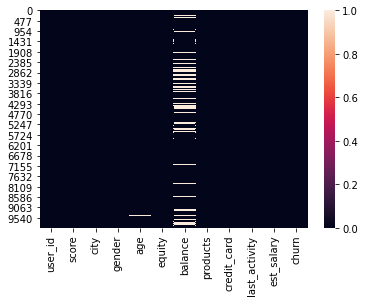

In [19]:
# покажем отсутствующие значения с помощью тепловой карты
sns.heatmap(df.isnull())
plt.show()

Проверка датафрейма на наличие пропусков показала отсутствие 26 значений по столбцу "возраст" (0,3%). Посмотрим, сколько из этих позиций приходится на отточных клиентов.

In [20]:
df.query('age.isna() and churn ==1')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3091,138660,836.00,Ростов,Ж,NaN,5,"294,315.53",2,0,1,"63,310.22",1


Создадим датафрейм с дополнительным столбцом, отражающим наличие или отсуствие пропусков во возрасту

In [21]:
df1=df.copy(deep=True)
df1['age_nan'] = df1['age'].isna().astype('int')
df1.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_nan
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0,0
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1,0


Используем дополнительный флаг наличия или отсуствия пропусков по возрасту как столбец сводной таблицы, где по каждому признаку будет посчитана мера центральной тендеции 

In [22]:
df_pivot_table = df1.pivot_table(index=['age_nan'],
                                values=['score', 'balance', 'est_salary', 'equity', 'products'],
                                aggfunc={'balance':[np.mean, np.median], 
                                        'score':[np.mean, np.median],
                                        'est_salary':[np.mean, np.median],
                                        'equity': 'median',
                                        'products':'median'}).T
df_pivot_table

age_nan                    0            1
balance    mean   827,245.59 1,250,033.57
           median 524,295.33   417,361.11
equity     median       3.00         0.00
est_salary mean   147,786.81   178,585.20
           median 119,626.79   142,598.86
products   median       2.00         1.00
score      mean       848.68       855.15
           median     853.00       888.50

Анализ признака, отвечающего за пропуск в столбце с возрастом (1 - если значение пропущено, 0 - если нет) показал, что
 - среднее значение баланса выше у клиентов с пропусками по возрасту, а медианное значение баланса выше у клиентов без пропущенных данных,
 - клиенты с пропусками по возрасту в основном не имеют оценок по баллам собственности,
 - средняя и медианная зарплата выше у клиентов с пропусками,
 - клиенты с пропусками по возрасту пользуются меньшим количеством продуктов банка, 
 - среднее и медианное значение балла кредитного скоринга чуть выше у клиентов с пропусками данных по возрасту.

Проверим зависимость между признаком по пропущенным данным по возрасту и остальными параметрами

In [23]:
df_corr_1=df1.drop(columns=['user_id']).corr()
df_corr_1['age_nan']

score            0.01
age               NaN
equity          -0.03
balance          0.01
products        -0.03
credit_card      0.01
last_activity    0.03
est_salary       0.01
churn           -0.02
age_nan          1.00
Name: age_nan, dtype: float64

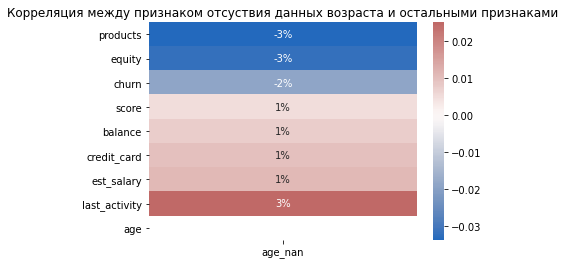

In [24]:
sns.heatmap(df_corr_1.loc[:,['age_nan']].drop('age_nan').sort_values('age_nan'), annot=True,fmt=".0%", cmap="vlag", center=0);
plt.title('Корреляция между признаком отсуствия данных возраста и остальными признаками')
plt.show()

Пропуски в столбцe "age" относятся к категории MCAR (Missing Completely At Random / Отсутствует совершенно случайно), т.к. у них слабая корреляция с другими признаками. Также среди пропущенных данных по возрасту только один пользователь является отточным, следовательно для анализа ушедших пользователей  заполнение пропусков в параметре "age" не изменят ситуацию. 

Также проверка датафрейма на наличие пропусков показала отсутствие 2295 значений по столбцу "баланс" (23 %). Посмотрим на позиции, которые относятся к отточным клиентам

In [25]:
df.query('balance.isna() and churn ==1')

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1273,136567,961.00,Ярославль,М,31.00,0,NaN,1,1,0,"1,015,386.14",1
1400,146876,707.00,Ярославль,М,24.00,0,NaN,3,1,0,"94,091.11",1
3017,123230,980.00,Рыбинск,Ж,53.00,0,NaN,1,1,1,"327,646.02",1
4118,157443,727.00,Ростов,М,69.00,0,NaN,1,1,0,"132,546.93",1
4302,167482,955.00,Ярославль,М,62.00,0,NaN,1,1,0,"157,784.96",1
5578,136508,739.00,Рыбинск,М,49.00,0,NaN,2,1,1,"280,945.17",1
6827,205707,953.00,Ярославль,М,30.00,0,NaN,3,1,0,"157,069.20",1
7572,144559,748.00,Ярославль,М,45.00,0,NaN,1,1,0,"288,756.23",1
8185,116284,743.00,Ярославль,М,48.00,0,NaN,1,1,1,"634,457.21",1
8611,195981,763.00,Ярославль,Ж,48.00,0,NaN,1,1,0,"248,232.39",1


Создадим датафрейм с дополнительным столбцом, отражающим наличие или отсутствие пропусков по балансу

In [26]:
df2=df.copy(deep=True)
df2['balance_nan'] = df1['balance'].isna().astype('int')
df2.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,balance_nan
0,183012,850.00,Рыбинск,Ж,25.00,1,"59,214.82",2,0,1,"75,719.14",1,0
1,146556,861.00,Рыбинск,Ж,37.00,5,"850,594.33",3,1,0,"86,621.77",0,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,"107,683.34",0,1
3,225363,866.00,Ярославль,Ж,51.00,5,"1,524,746.26",2,0,1,"174,423.53",1,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,"67,353.16",1,0


Используем дополнительный флаг наличия или отсутствия пропусков по балансу как столбец сводной таблицы, где по каждому признаку будет посчитана мера центральной тендеции

In [27]:
df_pivot_table2 = df2.pivot_table(index=['balance_nan'],
                                values=['score', 'age', 'est_salary', 'equity', 'products'],
                                aggfunc={'age':'median', 
                                        'score':[np.mean, np.median],
                                        'est_salary':[np.mean, np.median],
                                        'equity': 'median',
                                        'products':'median'}).T
df_pivot_table2.columns = ['Не отточные клиенты', 'Отточные клиенты']
df_pivot_table2

Не отточные клиенты  Отточные клиенты
age        median                40.00             40.00
equity     median                 4.00              0.00
est_salary mean             124,501.87        226,310.21
           median           106,222.20        174,160.68
products   median                 2.00              1.00
score      mean                 843.74            865.35
           median               840.00            903.00

Анализ признака, отвечающего за пропуск в столбце с балансом (1 - если значение пропущено, 0 - если нет) показал, что
 - средний возраст клиентов обоих групп не отличается,
 - клиенты с пропусками по балансу в основном не имеют оценок по баллам собственности,
 - средняя и медианная зарплата выше у клиентов с пропусками,
 - клиенты с пропусками по балансу пользуются меньшим количеством продуктов банка, 
 - среднее и медианное значение балла кредитного скоринга чуть выше у данных с пропусками.

Проверим зависимость между признаком по пропущенным данным по балансу и остальными параметрами

In [28]:
df_corr_2=df2.drop(columns=['user_id']).corr()
df_corr_2['balance_nan']

score            0.14
age             -0.03
equity          -0.71
balance           NaN
products        -0.49
credit_card      0.16
last_activity    0.03
est_salary       0.31
churn           -0.25
balance_nan      1.00
Name: balance_nan, dtype: float64

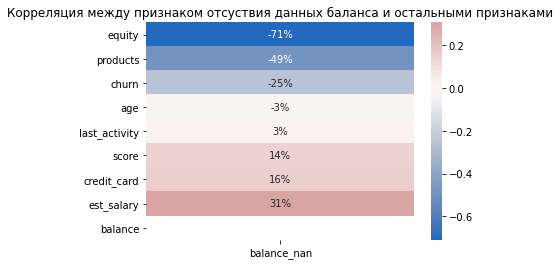

In [29]:
sns.heatmap(df_corr_2.loc[:,['balance_nan']].drop('balance_nan').sort_values('balance_nan'), annot=True,fmt=".0%", cmap="vlag", center=0);
plt.title('Корреляция между признаком отсуствия данных баланса и остальными признаками')
plt.show()

Пропуски в столбцe "balance" относятся к категории MNAR (Missing Not At Random / Отсутствует не случайно), т.к. коррелируют со многими параметарми ("equity", "est_salary" и др.). Таким образом, пропуски в столбце "баланс" зависят от остальных данных, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

Анализ пропусков показал, что можно удалить данные только с пропущенными значениями по возрасту.

In [30]:
df = df.dropna(subset=['age'])

In [31]:
display(df.isna().sum())

user_id             0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

На этапе изучения общей информации датафрейма было выявлено, что минимальное значение количество продуктов банка, которыми пользуется клиент, равно 0. Выведем данные по этим клиентам.


In [32]:
df[df['products']==0]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962.00,Рыбинск,Ж,79.00,3,NaN,0,0,0,"25,063.96",1


Полученные данные касаются только одного клиента, будем считать, что информация о количестве используемых продуктов занесена ошибочно, т.к. как только человек становится клиентом банка, он сразу же начинает пользоваться хотя бы одним каким-то продуктом банка (дебетовая или кредитная карта, депозит и прочее). Заполним данную аномалию значением 1.

In [33]:
df_final=df.copy(deep=True)

In [34]:
df_final.loc[df['products'] == 0, 'products'] = 1

In [35]:
#столбец с данными по возрасту приведем к типу int
df_final['age'] = df_final['age'].astype('int')

In [36]:
# выведем общую информацию по скорректированному датафрейму
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        9974 non-null   int64  
 1   score          9974 non-null   float64
 2   city           9974 non-null   object 
 3   gender         9974 non-null   object 
 4   age            9974 non-null   int64  
 5   equity         9974 non-null   int64  
 6   balance        7695 non-null   float64
 7   products       9974 non-null   int64  
 8   credit_card    9974 non-null   int64  
 9   last_activity  9974 non-null   int64  
 10  est_salary     9974 non-null   float64
 11  churn          9974 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1013.0+ KB


Для дальнейшего анализа корреляции проведем кодирование категориальных переменных по столбцам "city" и "gender".

In [37]:
# создадим копии столбцов "city" и "gender"
df_final['city_2']=df_final['city']
df_final['gender_2']=df_final['gender']

In [38]:
# закодируем данные в столбцах city_2 и gender_2:
df_final = pd.get_dummies(df_final, columns = ['city_2'])
df_final = pd.get_dummies(df_final, columns = ['gender_2'], drop_first=True)
df_final = df_final.rename (
                           columns = ({'city_2_Ростов':'Ростов', 
                                        'city_2_Рыбинск':'Рыбинск',
                                        'city_2_Ярославль':'Ярославль', 
                                        'gender_2_М':'gender_2'}))
display(df_final.head(), df_final.tail())

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,0,1,0,0
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,0,1,0,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0,1,0,0
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,1,0
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,0,0,1,1


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
9995,120553,814.00,Рыбинск,М,27,1,"78,144.65",1,0,1,"18,943.64",0,0,1,0,1
9996,139170,894.00,Ярославль,М,46,0,NaN,1,1,0,"196,898.29",0,0,0,1,1
9997,115639,903.00,Ярославль,М,24,0,NaN,2,1,1,"108,905.09",0,0,0,1,1
9998,148700,777.00,Ярославль,Ж,68,3,"865,457.97",3,0,1,"86,874.90",0,0,0,1,0
9999,96267,828.00,Рыбинск,Ж,58,3,"1,180,886.70",4,0,1,"21,422.37",0,0,1,0,0


**Выводы:**

 - названия столбцов "USERID" и "EST_SALARY" приведены к единому стилю snake_case;
 - датафрейм проверен на наличие явных и неявных дубликатов, решено сохранить все данные, т.к. они являются уникальными относительно разных городов;
 - пропуски в столбце "age" отнесены к типу MCAR и удалены;
 - пропуски в столбце "balance" отнесены к типу MNAR сохранены без изменений;
 - столбец "age" приведен к типу int;
 - аномальное значение по количетву продуктов у одного из клиентов банка заменено с 0 на 1;
 - проведно кодирование категориальных переменных по столбцам "city" и "gender";
 - итоговый датафрейм содержит 9974 записи данных.

### Исследовательский анализ данных:

**Исследование корреляции всех признаков датафрейма.**

In [39]:
df_corr=df_final.drop(columns=['user_id']).corr()

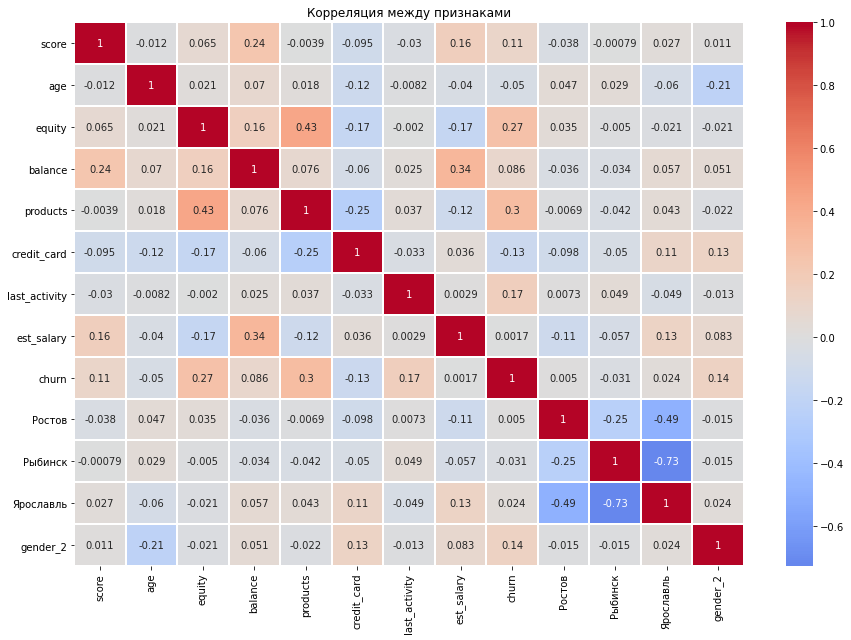

In [40]:
plt.figure(figsize=(15,10))
sns.heatmap (df_corr, annot=True, cmap='coolwarm', center=0, linewidths=1);
plt.title('Корреляция между признаками')
plt.show()

   Используем шкалу Чеддока для оценки силы связи между признаками, где значения равные:  
        * от 0 до 0,3 — характеризуют очень слабую связь;   
        * от 0,3 до 0,5 — слабая связь;   
        * от 0,5 до 0,7 — средняя связь;   
        * от 0,7 до 0,9 — высокая связь;   
        * от 0,9 до 1 — очень высокая связь.   

Можно заметить слабую корреляцию между балансом и оценочным доходом клиентов (0,34), между количеством баллов собственности и количеством продуктов, которыми пользуется клиент (0,43), показателем оттока и количеством продуктов (0,3). Связь между остальными признаками очень слабая. 

**Покажем взаимосвязь признака оттока с остальными критериями отдельно.**

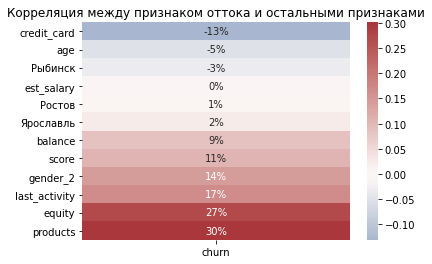

In [41]:
sns.heatmap(df_corr.loc[:,['churn']].drop('churn').sort_values('churn'), annot=True, fmt=".0%", cmap="vlag", center=0);
plt.title('Корреляция между признаком оттока и остальными признаками')
plt.show()

  Наибольшая из всех корреляций с показателем оттока клиентов у таких параметров как:
- количество продуктов, которыми пользуется клиент (products) - 0,3
- количество баллов собственности (equity) - 0,27
- активность клиента (last_activity) - 0,17
- пол (gender_2) - 0,14
- наличие кредитной карты (credit_card) - 0,13
- баллы кредитного скоринга (score) - 0,11

**Расчет мер центральной тенденции**

 Перед расчетом мер центральной тенденции, описывающей портреты клиентов, посмотрим есть ли выбросы у непрерывных категорий (возраст, баллы кредитного скоринга, баланc на счете и оценочный доход клиента) в разрезе отточных и не оттточных клиентов.

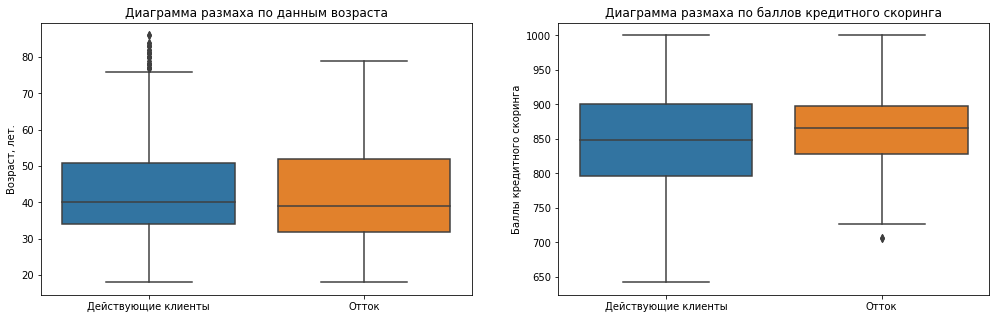

In [42]:
# назначаем размер графика
plt.figure(figsize=(17, 5))
# строим диаграммы размаха или "ящики с усами" 
ax = sns.boxplot(x='churn', y='age', data=df_final, ax=plt.subplot(1, 2, 1)) 
plt.xlabel('')
plt.ylabel('Возраст, лет.')
plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
plt.title('Диаграмма размаха по данным возраста')

ax = sns.boxplot(x='churn', y='score', data=df_final, ax=plt.subplot(1, 2, 2)) 
plt.xlabel('')
plt.ylabel('Баллы кредитного скоринга')
plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
plt.title('Диаграмма размаха по баллов кредитного скоринга')

plt.show();

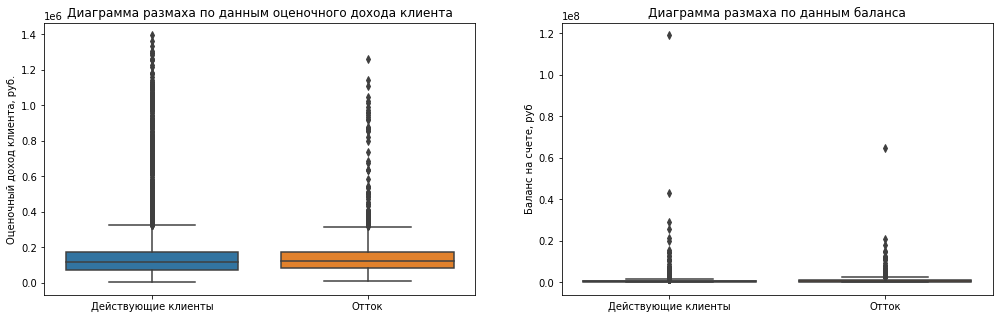

In [43]:
# назначаем размер графика
plt.figure(figsize=(17, 5))
# строим диаграммы размаха или "ящики с усами"
ax = sns.boxplot(x='churn', y='est_salary', data=df_final, ax=plt.subplot(1, 2, 1)) 
plt.xlabel('')
plt.ylabel('Оценочный доход клиента, руб.')
plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
plt.title('Диаграмма размаха по данным оценочного дохода клиента')

ax = sns.boxplot(x='churn', y='balance', data=df_final, ax=plt.subplot(1, 2, 2)) 
plt.xlabel('')
plt.ylabel('Баланс на счете, руб')
plt.xticks(np.arange(2), ('Действующие клиенты', 'Отток'))
plt.title('Диаграмма размаха по данным баланса')

plt.show();

Выяснили, что все непрерывные признаки имеют выбросы, следовательно при расчете мер центральной тенденции по ним необходимо расчитывать как средние так медианные значения, за исключением категории возраст (по ней будем расчитывать только медиану).

In [44]:
#расчитаем средние значения для непрерывных и бинарных признаков в разрезе оттока
df_churn_1 = df_final.pivot_table(index='churn',
                                values=['score',
                                        'est_salary', 
                                        'balance',
                                        'credit_card',
                                        'last_activity'],
                                        aggfunc='mean').T
              
              
df_churn_1.columns=['Ср. значения признака по не отточным клиентам', 'Ср. значения признака по отточным клиентам']  
df_churn_1['Разница,%']=(((df_churn_1['Ср. значения признака по отточным клиентам'] - df_churn_1['Ср. значения признака по не отточным клиентам']) /df_churn_1['Ср. значения признака по отточным клиентам'])*100).round(2)
df_churn_1.sort_values(by='Разница,%', ascending=False)

,Ср. значения признака по не отточным клиентам,Ср. значения признака по отточным клиентам,"Разница,%"
balance,"733,031.63","1,134,458.21",35.38
last_activity,0.48,0.70,31.22
score,845.40,863.42,2.09
est_salary,"147,674.64","148,289.70",0.41
credit_card,0.71,0.55,-28.56


In [45]:
#расчитаем медиану для непрерывных и категориальных признаков в разрезе оттока
df_churn_2 = df_final.pivot_table(index='churn',
                                values=['score',
                                        'est_salary', 
                                        'balance',
                                        'equity',
                                        'products',
                                        'age'],
                                        aggfunc='median').T
              
              
df_churn_2.columns=['Медианные значения признака по не отточным клиентам', 'Медианные значения признака по отточным клиентам']  
df_churn_2.sort_values(by='Медианные значения признака по отточным клиентам', ascending=False)

,Медианные значения признака по не отточным клиентам,Медианные значения признака по отточным клиентам
balance,"475,410.09","783,908.90"
est_salary,"118,227.60","125,395.22"
score,848.00,866.00
age,40.00,39.00
equity,3.00,4.00
products,2.00,2.00


Найдем моду для незакодированных категориальных переменных: "gender" и "city"

In [46]:
df_3=df_final[['city', 'gender','churn']]
df_4=df_3.query('churn==1')
df_4

,city,gender,churn
0,Рыбинск,Ж,1
3,Ярославль,Ж,1
4,Ярославль,М,1
12,Ярославль,Ж,1
40,Рыбинск,М,1
...,...,...,...
9981,Рыбинск,М,1
9986,Ярославль,М,1
9987,Рыбинск,Ж,1
9992,Рыбинск,М,1


In [47]:
df_mode_gender = mode(df_4['gender'])
print("Мода по переменной gender для отточных клиентов: ", df_mode_gender)

Мода по переменной gender для отточных клиентов:  М


In [48]:
df_mode_city = mode(df_4['city'])
print("Мода по переменной city для отточных клиентов: ", df_mode_city)

Мода по переменной city для отточных клиентов:  Ярославль


In [49]:
df_5=df_3.query('churn==0')
df_mode_gender_2 = mode(df_5['gender'])
print("Мода по переменной gender для не отточных клиентов: ", df_mode_gender_2)

Мода по переменной gender для не отточных клиентов:  Ж


In [50]:
df_mode_city_2 = mode(df_5['city'])
print("Мода по переменной city для отточных клиентов: ", df_mode_city_2)

Мода по переменной city для отточных клиентов:  Ярославль


Таким образом, можно составить портреты клиентов.

In [51]:
df_churn_3=df_final.pivot_table(index=['churn'],
                     values=['score',
                             'est_salary', 
                              'balance',
                              'equity',
                              'products',
                              'credit_card',
                              'last_activity',
                              'age',
                              'gender',
                              'city'],
                                    aggfunc=({'score':['mean','median'],
                                            'est_salary':['mean','median'],
                                            'balance':['mean','median'],
                                             'credit_card':'mean',
                                             'last_activity':'mean',
                                             'equity':'median',
                                             'products':'median',
                                             'age':'median',
                                             'gender':pd.Series.mode,
                                             'city':pd.Series.mode})
                    
                    ).T
df_churn_3.columns=['Значения признака по не отточным клиентам', 'Значения признака по отточным клиентам']  
df_churn_3

Значения признака по не отточным клиентам  \
age           median                                        40   
balance       mean                                  733,031.63   
              median                                475,410.09   
city          mode                                   Ярославль   
credit_card   mean                                        0.71   
equity        median                                         3   
est_salary    mean                                  147,674.64   
              median                                118,227.60   
gender        mode                                           Ж   
last_activity mean                                        0.48   
products      median                                         2   
score         mean                                      845.40   
              median                                    848.00   

                     Значения признака по отточным клиентам  
age           median                                     39  
balance       mean                             1,134,458.21  
              median                             783,908.90  
city          mode                                Ярославль  
credit_card   mean                                     0.55  
equity        median                                      4  
est_salary    mean                               148,289.70  
              median                             125,395.22  
gender        mode                                        М  
last_activity mean                                     0.70  
products      median                                      2  
score         mean                                   863.42  
              median                                 866.00

 **Характерные черты отточного клиента:**
  - Город - Ярославль,
  - Пол - Мужской,
  - Возраст - 39 лет,
  - Баланс на счете - 783 908,90,
  - Оценочный доход - 125 395,22,
  - Баллы кредитного скоринга - 866,
  - Кредитная карта - нет,
  - Активность клиента - есть,
  - Количество баллов собственности - 4,
  - Количество продуктов - 2.

  **Характерные черты не отточного клиента:**
  - Город - Ярославль,
  - Пол - Женский,
  - Возраст - 40 лет,
  - Баланс на счете - 475 410,09,
  - Оценочный доход - 118 227,60,
  - Баллы кредитного скоринга - 846,
  - Кредитная карта - есть,
  - Активность клиента - есть,
  - Количество баллов собственности - 3,
  - Количество продуктов - 2.

**Изучение категориальные признаков с точки зрения отточности**

In [52]:
#создадим функцию, которая будет отражать сводные таблицы pivot_table с уровнем оттока по категориям 
# и столбчатые диаграммы со средним уровнем оттока по банку.
def categorial_churn(data, col):
    tabl = data.pivot_table(index=col, values='churn', aggfunc=['sum', 'count']).reset_index()
    tabl.columns = [col,'sum_churn', 'total']
    tabl['percent'] = round((tabl['sum_churn'] / tabl['total'])*100,2)
    display(tabl)
    
    plt.figure(figsize=(5,5))
    sns.barplot(data=tabl, x=col, y='percent')
    plt.axhline(round((df['churn'].sum() / df['churn'].count())*100,2), linewidth=1, color='r', linestyle='--')
    plt.title(f'Распределение процента оттока по {col}')
    plt.xlabel(f'Признак {col}')
    plt.ylabel('Процент, %')

    plt.show()
    return 

In [53]:
def categorial_churn_2(data, col):
    tabl = data.pivot_table(index=col, values='churn', aggfunc=['sum', 'count','mean']).reset_index()
    tabl.columns = [col,'sum_churn', 'total','percent']
    tabl['percent']=tabl['percent']*100
    display(tabl)
    
    plt.figure(figsize=(5,5))
    sns.barplot(data=tabl, x=col, y='percent')
    plt.axhline(round((df['churn'].sum() / df['churn'].count())*100,2), linewidth=1, color='r', linestyle='--')
    plt.title(f'Распределение процента оттока по {col}')
    plt.xlabel(f'Признак {col}')
    plt.ylabel('Процент, %')

    plt.show()
    return 

,city,sum_churn,total,percent
0,Ростов,265,1416,18.71
1,Рыбинск,437,2683,16.29
2,Ярославль,1117,5875,19.01


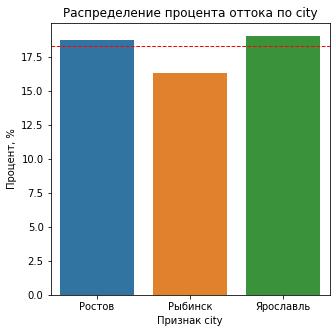

In [54]:
categorial_churn_2(df_final, 'city')

,city,sum_churn,total,percent
0,Ростов,265,1416,18.71
1,Рыбинск,437,2683,16.29
2,Ярославль,1117,5875,19.01


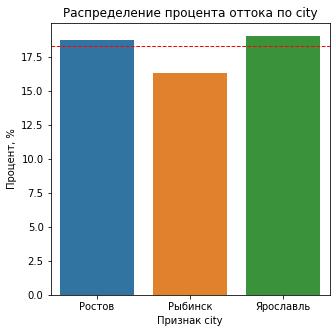

In [55]:
# оценим влияние категории "city" на отток клиентов
categorial_churn(df_final, 'city')

Самый большой отток клиентов в абсолютном выражении наблюдается в филиале банка г. Ярославль - 1117 человек. Также из графика видно, что в Ярославле и Ростове процент оттока выше среднего процента по банку в целом. 

,gender,sum_churn,total,percent
0,Ж,636,4983,12.76
1,М,1183,4991,23.70


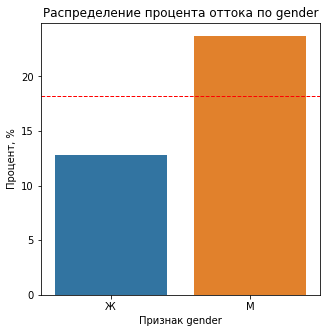

In [56]:
# оценим влияние категории "gender" на отток клиентов
categorial_churn(df_final, 'gender')

Среди отточных клиентов мужчин почти в два раза больше чем женщин. Также процент оттока мужчин значительно выше среднего процента по банку в целом.

,equity,sum_churn,total,percent
0,0,90,2576,3.49
1,1,93,773,12.03
2,2,166,1051,15.79
3,3,322,1541,20.90
4,4,464,1847,25.12
5,5,576,1915,30.08
6,6,58,161,36.02
7,7,37,80,46.25
8,8,6,17,35.29
9,9,7,13,53.85


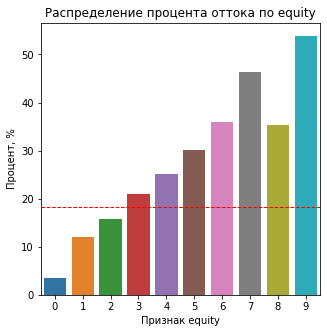

In [57]:
# оценим влияние категории "equity" на отток клиентов
categorial_churn(df_final, 'equity')

С ростом баллов собственности возрастает и процент отточных клиентов. Процент людей, уходящих из банка и имеющих от 3 до 9 баллов собственности, выше среднего процента по банку. 

,products,sum_churn,total,percent
0,1,236,3324,7.10
1,2,978,5119,19.11
2,3,297,1038,28.61
3,4,300,474,63.29
4,5,8,19,42.11


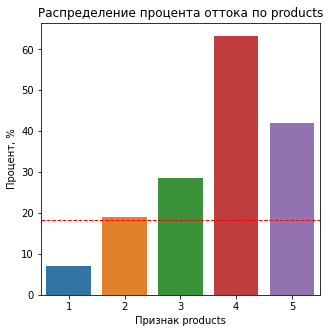

In [58]:
# оценим влияние категории "products" на отток клиентов
categorial_churn(df_final, 'products')

Больше всего отточных клиентов среди тех, кто пользуется двумя продуктами банка - 978 человек. Процент оттока пользователей, которые пользуются больше, чем одним продуктом, превышает средний процент по банку. Самый высокий отток у клиентов, которые пользуются четырьмя продуктами.

In [59]:
def categorial_churn_1(data, col):
    tabl = data.pivot_table(index=col, values='churn', aggfunc=['sum', 'count']).reset_index()
    tabl.columns = [col,'sum_churn', 'total']
    tabl['percent'] = round((tabl['sum_churn'] / tabl['total'])*100,2)
    display(tabl)
    
    plt.figure(figsize=(5,5))
    sns.barplot(data=tabl, x=col, y='percent')
    plt.axhline(round((df['churn'].sum() / df['churn'].count())*100,2), linewidth=1, color='r', linestyle='--')
    plt.title(f'Распределение процента оттока по {col}')
    plt.xlabel(f'Признак наличия {col}')
    plt.xticks(ticks=[0,1], labels=['нет', 'да'])
    plt.ylabel('Процент, %')

    plt.show()
    return 

,credit_card,sum_churn,total,percent
0,0,816,3190,25.58
1,1,1003,6784,14.78


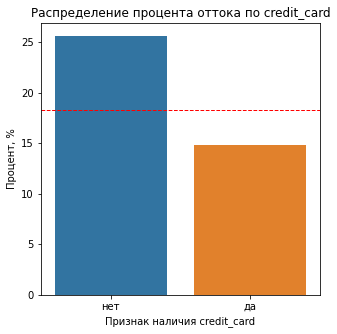

In [60]:
# оценим влияние наличия кредитной карты (признак "credit_card") на отток клиентов
categorial_churn_1(df_final, 'credit_card')

Процент ушедших пользователей, у которых не было кредитной карты значительно больше, чем у которых такая карта была и он превышает средний процент по банку. 

,last_activity,sum_churn,total,percent
0,0,542,4759,11.39
1,1,1277,5215,24.49


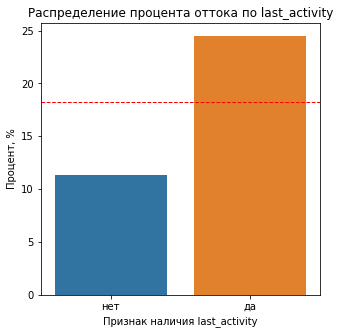

In [61]:
# оценим влияние показателя активности (признак "last_activity") на отток клиентов
categorial_churn_1(df_final, 'last_activity')

Активных клиентов, которые планируют уйти из банка, более чем в два раза больше, чем неактивных. Также процент активных отточных клиентов выше, чем в среднем по банку.

**Выводы**

Таким образом, категориальные признаки, оказывающие наибольшее влияние на отток, это:
 - город филиала банка: Ярославль и Ростов;
 - пол клиента: мужской;
 - количество баллов собственности: 3 и более;
 - количество продуктов клиента: 2 и более;
 - кредитная карта: отсутствует;
 - активность клиента: есть.

**Изучение непрерывных признаков с точки зрения отточности**

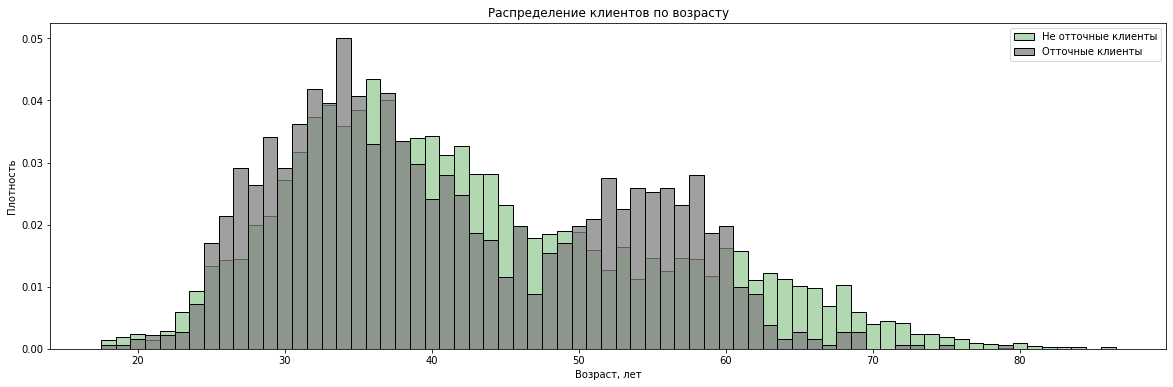

In [62]:
# оценим влияние возраста на отток клиентов
plt.figure(figsize=(20,6))
sns.histplot(df_final[df_final['churn'] == 0]['age'], discrete=True, stat='density', common_norm=False, color='Green', alpha=0.3);
sns.histplot(df_final[df_final['churn'] == 1]['age'], discrete=True, stat='density', common_norm=False, color='Grey');
plt.title(f'Распределение клиентов по возрасту')
plt.xlabel('Возраст, лет', size=10)
plt.ylabel('Плотность', size=10)
plt.legend(['Не отточные клиенты', 'Отточные клиенты'])
plt.show()

   Возраст отточных клиентов это:
   - 21 год,
   - от 25 до 35 лет, 
   - 36 - 37 лет, 
   - 46 лет,
   - от 50 до 60 лет. 

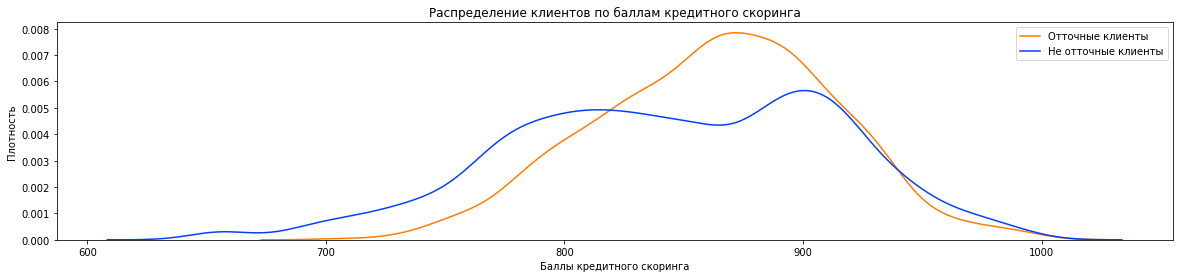

In [63]:
# оценим влияние баллов кредитного скоринга на отток клиентов
plt.figure(figsize=(20,4))
sns.kdeplot(data=df_final, x="score", hue="churn", common_norm=False, palette="bright")
plt.title(f'Распределение клиентов по баллам кредитного скоринга')
plt.xlabel('Баллы кредитного скоринга', size=10)
plt.ylabel('Плотность', size=10)
plt.legend(['Отточные клиенты','Не отточные клиенты'])
plt.show();

К отточным клиентам можно отнести людей, у которых баллы кредитного скоринга лежат в диапазоне от 820 до 940.

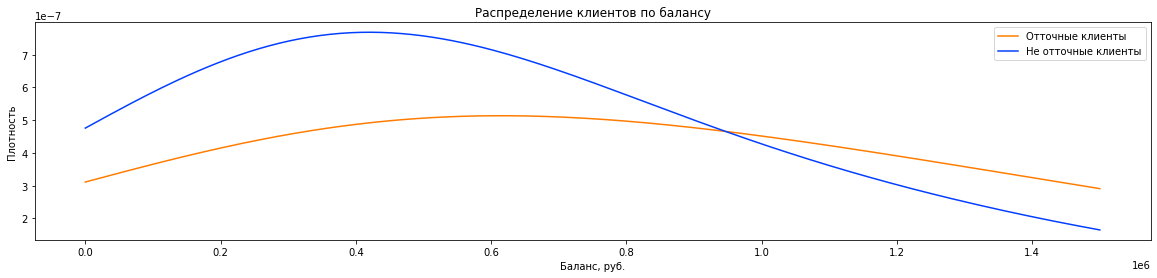

In [64]:
# оценим влияние баланса на отток клиентов
plt.figure(figsize=(20,4))
sns.kdeplot(data=df_final, x="balance", hue="churn", common_norm=False, clip=(0.0, 1500000.0), palette="bright")
plt.title(f'Распределение клиентов по балансу')
plt.xlabel('Баланс, руб.', size=10)
plt.ylabel('Плотность', size=10)
plt.legend(['Отточные клиенты','Не отточные клиенты'])
plt.show();

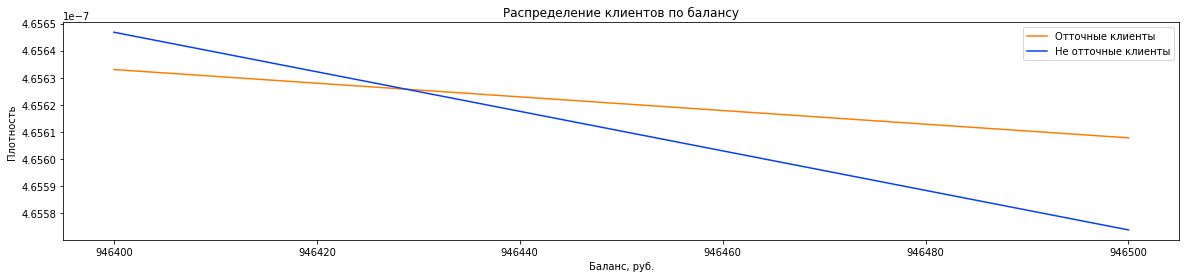

In [65]:
#уточним пересечение
plt.figure(figsize=(20,4))
sns.kdeplot(data=df_final, x="balance", hue="churn", common_norm=False, clip=(946400.0, 946500.0), palette="bright")
plt.title(f'Распределение клиентов по балансу')
plt.xlabel('Баланс, руб.', size=10)
plt.ylabel('Плотность', size=10)
plt.legend(['Отточные клиенты','Не отточные клиенты'])
plt.show();

К отточным клиентам можно отнести людей с остатоком баланса на счете более 946 430 руб.

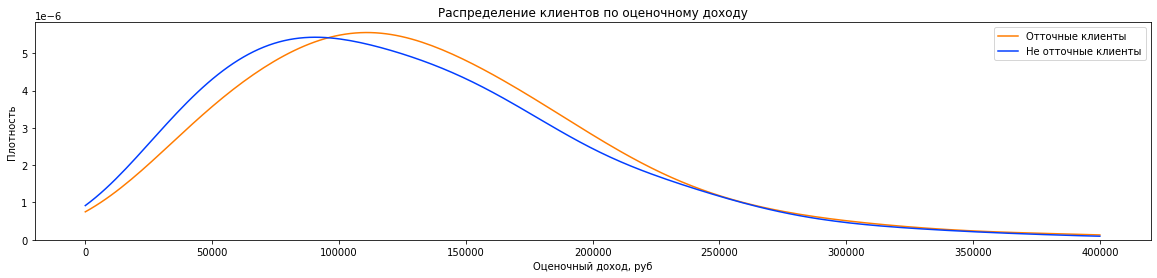

In [66]:
# оценим влияние оценочного дохода на отток клиентов
plt.figure(figsize=(20,4))
sns.kdeplot(data=df_final, x="est_salary", hue="churn", common_norm=False, clip=(0.0, 400000.0), palette="bright")
plt.title(f'Распределение клиентов по оценочному доходу')
plt.xlabel('Оценочный доход, руб', size=10)
plt.ylabel('Плотность', size=10)
plt.legend(['Отточные клиенты','Не отточные клиенты'])
plt.show();

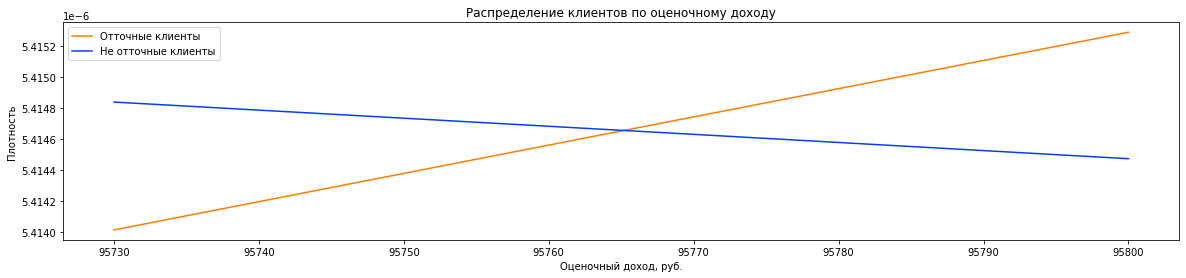

In [67]:
#уточним пересечение
plt.figure(figsize=(20,4))
sns.kdeplot(data=df_final, x="est_salary", hue="churn", common_norm=False, clip=(95730.0, 95800.0), palette="bright")
plt.title(f'Распределение клиентов по оценочному доходу')
plt.xlabel('Оценочный доход, руб.', size=10)
plt.ylabel('Плотность', size=10)
plt.legend(['Отточные клиенты','Не отточные клиенты'])
plt.show();

К отточным клиентам можно отнести людей с оценочным доходом от 95 765 рублей до 250 000 рублей.

**Выводы**

Таким образом, непрерывные признаки, оказывающие наибольшее влияние на отток, это:
 - возраст клиента: 
    - 21 год,
    - от 25 до 35 лет, 
    - 36 - 37 лет, 
    - 46 лет,
    - от 50 до 60 лет;
 - баллы кредитного скоринга: от 820 до 940;
 - баланс на счете: более 946 430 руб;
 - оценочный доход клиента: от 95 765 до 250 000 рублей.

### Формулировка и проверка статистических гипотез

   Условия применения t-критерия Стьюдента:
- Генеральные совокупности не зависят друг от друга,
- Выборочные средние нормально распределены,
- Дисперсии рассматриваемых генеральных совокупностей равны.

  Условия применения U-критерия Манна-Уитни:
 - Генеральные совокупности не зависят друг от друга,
 - Не требуется наличия нормального распределения,
 - Зависимая переменная должна измеряться в порядковой или непрерывной шкале,
 - Независимая переменная должна состоять из двух категориальных независимых групп,

U-тест Манна-Уитни является непараметрическим аналогом t-теста для независимых выборок, он подчиняется менее строгим предположениям, чем t-тест. Поэтому U-критерий Манна-Уитни всегда используется , когда требование нормального распределения для t-теста не выполняется .

**Проверка гипотезы равенства среднего дохода между теми клиентами, которые ушли и теми, которые остались**

In [68]:
#создадим из исходного датафрейма два новых по признаку отточности клиентов
df_churn_0=df_final.query('churn==0')
df_churn_0

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
1,146556,861.00,Рыбинск,Ж,37,5,"850,594.33",3,1,0,"86,621.77",0,0,1,0,0
2,120722,892.00,Рыбинск,Ж,30,0,NaN,1,1,1,"107,683.34",0,0,1,0,0
5,202305,856.00,Рыбинск,М,56,4,"863,687.24",3,1,0,"156,619.80",0,0,1,0,1
6,177259,807.00,Ярославль,Ж,39,3,"405,042.44",3,0,1,"103,838.32",0,0,0,1,0
7,218868,825.00,Ярославль,Ж,38,4,"458,145.40",2,1,1,"68,085.48",0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27,1,"78,144.65",1,0,1,"18,943.64",0,0,1,0,1
9996,139170,894.00,Ярославль,М,46,0,NaN,1,1,0,"196,898.29",0,0,0,1,1
9997,115639,903.00,Ярославль,М,24,0,NaN,2,1,1,"108,905.09",0,0,0,1,1
9998,148700,777.00,Ярославль,Ж,68,3,"865,457.97",3,0,1,"86,874.90",0,0,0,1,0


In [69]:
df_churn_1=df_final.query('churn==1')
df_churn_1

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Ростов,Рыбинск,Ярославль,gender_2
0,183012,850.00,Рыбинск,Ж,25,1,"59,214.82",2,0,1,"75,719.14",1,0,1,0,0
3,225363,866.00,Ярославль,Ж,51,5,"1,524,746.26",2,0,1,"174,423.53",1,0,0,1,0
4,157978,730.00,Ярославль,М,34,5,174.00,1,1,0,"67,353.16",1,0,0,1,1
12,132970,845.00,Ярославль,Ж,31,3,"591,928.52",2,1,1,"112,697.16",1,0,0,1,0
40,129705,811.00,Рыбинск,М,34,2,"129,799.35",1,0,0,"96,242.71",1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,154871,892.00,Рыбинск,М,39,5,"636,287.72",2,0,1,"227,288.27",1,0,1,0,1
9986,152986,822.00,Ярославль,М,58,5,"1,434,857.91",2,0,1,"83,442.41",1,0,0,1,1
9987,151279,783.00,Рыбинск,Ж,61,3,"387,916.16",2,1,0,"63,160.96",1,0,1,0,0
9992,167165,813.00,Рыбинск,М,48,2,"179,765.62",2,1,0,"133,972.11",1,0,1,0,1


Проверим генеральные совокупности в разрезе дохода клиентов на соответствие критериям для проведения t-testa (примем alpha = 0.05 как критический уровень статистической значимости). При помощи критерия Шапиро-Уилка проверим данные по зарплате отточных и неотточных клиентов на нормальность распределения.

In [70]:
alpha =0.05

results = st.shapiro(df_churn_0['est_salary'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [71]:
#from scipy.stats import kstest

#stat, p_value = kstest(df_churn_0['est_salary'], df_churn_1['est_salary'])
#print(f" Kolmogorov-Smirnov Test: statistic={stat:.4f}, p-value= {p_value:.4f}")
#print(round(p_value,5))

In [72]:
alpha =0.05

results = st.shapiro(df_churn_1['est_salary'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Расчитаем дисперсии двух выборок

In [73]:
print('Дисперсия дохода не отточных клиентов', df_churn_0['est_salary'].var())
print('Дисперсия дохода отточных клиентов', df_churn_1['est_salary'].var())

Дисперсия дохода не отточных клиентов 20358839437.943962
Дисперсия дохода отточных клиентов 15112316536.374706


   Таким образом, условия применения t-критерия Стьюдента: 
- Генеральные совокупности не зависят друг от друга - выполняется,
- Выборочные средние нормально распределены - выполняется , т.к. размеры выборок составляют несколько десятков значений, а значит выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены близко к нормальному вокруг истинного среднего этой совокупности. Это так, даже если сама генеральная совокупность не распределена нормально.
- Дисперсии рассматриваемых генеральных совокупностей равны - не выполняется. Для корректоной работы теста установим специальный параметр "equal_var=False", при котором статистический метод не будет считать равными дисперсии выборок.

Сформулируем гипотезы:
 - Нулевая гипотеза (Н0): средние значения дохода отточных и не отточных клиентов равны.  
 - Альтернативная гипотеза(H1): средние значения дохода отточных и не отточных клиентов не равны. 

In [74]:
# расчитаем средние значения дохода отточных и не отточных клиентов
print (f'Cреднее значение дохода не отточных клиентов:', df_churn_0['est_salary'].mean().round(2))
print (f'Cреднее значение дохода отточных клиентов::', df_churn_1['est_salary'].mean().round(2))

#задаём уровень значимости
alpha = 0.5

#проверяем гипотезу на основании двухвыборочного t-теста для независимых выборок
results = st.ttest_ind(df_churn_0['est_salary'], df_churn_1['est_salary'], equal_var=False)

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Нет оснований отвергнуть нулевую гипотезу, вывод о различии сделать нельзя')

Cреднее значение дохода не отточных клиентов: 147674.64
Cреднее значение дохода отточных клиентов:: 148289.7
p-value: 0.8515799588935961
Нет оснований отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Таким образом, t-критерия Стьюдента показал, что на имеющихся данных при уровне значимости 5 % (уровне доверия 95%) нет оснований отвергнуть нулевую гипотезу в пользу альтернативы, т.е. средние значения дохода отточных и не отточных клиентов равны.

Так как отсуствует нормальное распределение сравниваемых выборок (уровень дохода между отточными и не отточными клиентами), для оценки рассматриваемой гипотезы воспользуемся методом непараметрической статистики - U-критерием Манна — Уитни.

In [75]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(df_churn_0['est_salary'], df_churn_1['est_salary'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Нет оснований отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  0.0001941125216825749
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод**

T-критерий Стьюдента был применен при неравенстве дисперсий генеральных совокупностей и не нормальном распределении данных по зарплате отточных/не отточных клиентов, его результат мог быть ошибочным. В связи с этим за верное решение примем результат непараметрического U-критерия Манна — Уитни: на имеющихся данных при уровне значимости 5 % (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы, т.е. средние значения дохода отточных и не отточных клиентов не равны.

**Проверка гипотезы равенства среднего количества баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались.**

При помощи критерия Шапиро-Уилка проверим данные по количеству баллов кредитного скоринга отточных и неотточных клиентов на нормальность распределения.

In [76]:
alpha =0.05

results = st.shapiro(df_churn_0['score'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  6.163534187648631e-26
Отвергаем нулевую гипотезу: распределение не нормально


In [77]:
alpha =0.05

results = st.shapiro(df_churn_1['score'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.00010632167686708272
Отвергаем нулевую гипотезу: распределение не нормально


Расчитаем дисперсии двух выборок

In [78]:
print('Дисперсия баллов кредитного скоринга не отточных клиентов', df_churn_0['score'].var())
print('Дисперсия баллов кредитного скоринга отточных клиентов', df_churn_1['score'].var())

Дисперсия баллов кредитного скоринга не отточных клиентов 4623.062654176869
Дисперсия баллов кредитного скоринга отточных клиентов 2462.242004849193


Сформулируем гипотезы:
 - Нулевая гипотеза (Н0): средние значения баллов кредитного скоринга отточных и не отточных клиентов равны.  
 - Альтернативная гипотеза(H1): средние значения баллов кредитного скоринга отточных и не отточных клиентов не равны. 

In [79]:
# расчитаем средние значения баллов кредитного скоринга отточных и не отточных клиентов
print (f'Cреднее значение баллов кредитного скоринга не отточных клиентов:', df_churn_0['score'].mean().round(2))
print (f'Cреднее значение баллов кредитного скоринга отточных клиентов::', df_churn_1['score'].mean().round(2))

Cреднее значение баллов кредитного скоринга не отточных клиентов: 845.4
Cреднее значение баллов кредитного скоринга отточных клиентов:: 863.42


Поскольку дисперсии генеральных совокупностей не равны и распределения данных по баллам кредитного скоринга отточных/не отточных клиентов не нормальны, для оценки гипотезы воспользуемся непараметрическим U-критерием Манна — Уитни.

In [80]:
alpha = 0.05  # критический уровень статистической значимости

results = st.mannwhitneyu(df_churn_0['score'], df_churn_1['score'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Нет оснований отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  3.3106768801060834e-22
Отвергаем нулевую гипотезу: разница статистически значима


**Вывод**

Таким образом, U-критерий Манна — Уитни показал, что на имеющихся данных при уровне значимости 5 % (уровне доверия 95%) есть основания отвергнуть нулевую гипотезу в пользу альтернативы, т.е. средние значения баллов кредитного скоринга отточных и не отточных клиентов не равны.

### Промежуточный итог

В результате проведенного исследовательского анализа данных получены следующие характеристики категорий, влиящих на отток

 **Наибольшая из всех корреляций с показателем оттока клиентов у таких параметров как:**
- количество продуктов, которыми пользуется клиент (products) - 0,3
- количество баллов собственности (equity) - 0,27
- активность клиента (last_activity) - 0,17
- пол (female, male) - 0,14
- наличие кредитной карты (credit_card) - 0,13
- баллы кредитного скоринга (score) - 0,11

**Характерные черты отточного клиента по данным расчета мер центральной тенденции:**
  - Город - Ярославль,
  - Пол - Мужской,
  - Возраст - 39 лет,
  - Баланс на счете - 783 908,90,
  - Оценочный доход - 125 395,22,
  - Баллы кредитного скоринга - 866,
  - Кредитная карта - нет,
  - Активность клиента - есть,
  - Количество баллов собственности - 4,
  - Количество продуктов - 2.

**Категориальные признаки, оказывающие наибольшее влияние на отток, это:**
 - город филиала банка: Ярославль и Ростов;
 - пол клиента: мужской;
 - количество баллов собственности: 3 и более;
 - количество продуктов клиента: 2 и более;
 - кредитная карта: отсутствует;
 - активность клиента: есть.

**Непрерывные признаки, оказывающие наибольшее влияние на отток, это:**
 - возраст клиента: 
    - 21 год,
    - от 25 до 35 лет, 
    - 36 - 37 лет, 
    - 46 лет,
    - от 50 до 60 лет;
 - баллы кредитного скоринга: от 820 до 940;
 - баланс на счете: более 946 430 руб;
 - оценочный доход клиента: от 95 765 до 250 000 рублей.

**Гипотеза равенства среднего дохода между теми клиентами, которые ушли и теми, которые остались, опровергнута.**

**Гипотеза равенства среднего количества баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались, опровергнута.**

 Таким образом, по данным различных методов анализа, возьмем 5 коррелирующих признаков с показателем отточности клиента:
   - Количество продуктов - 2 и более;
   - Количество баллов собственности - 3 и более;
   - Активность клиента - есть.
   - Пол - мужской;
   - Баллы кредитного скоринга - от 820 до 940.
   
  Данные признаки будут использованы для сегментации клиентов 

### Сегментация клиентов

 За основу сегментации приняты следующие условия: 
   - отток в сегменте более чем в 2 раза больше чем в банке в среднем;
   - размер сегмента в диапазоне от 300-2000 человек;
   - если сегментов больше 3-5, то один интервал может использоваться в 1-2 сегментах.

In [81]:
# найдем среднюю отточность клиентов по банку
churn_avg = df_final['churn'].mean()
print('Средняя отточность по банку:',"{:.2%}".format(churn_avg),'\n')

Средняя отточность по банку: 18.24% 



Проведем объединение признаков для получения сегментов.

**Сегмент №1**

In [82]:
segment_1= df_final.query('products >= 2 and 820 < score < 940  and last_activity==1').agg({'churn':['mean','sum','count']})
segment_1

,churn
mean,0.45
sum,911.00
count,"2,008.00"


Размер сегмента: 2008 клиентов, уровень оттока 45 %, 911 отточных клиентов и 1097 неотточных клиентов.  
Вывод: сегмент на максимальной допустимой границе, достаточно отточный - подходит.

In [83]:
segment_1v2= df_final.query('products > 2 and 820 < score < 940  and last_activity==1').agg({'churn':['mean','sum','count']})
segment_1v2 

,churn
mean,0.55
sum,300.00
count,549.00


**Сегмент №2**

Размер сегмента: 549 клиентов, уровень оттока 55 %, 300 отточных клиентов и 249 неотточных клиентов.  
Вывод: сегмент меньше среднего, сильно отточный - подходит.

In [84]:
segment_2= df_final.query('equity >= 3 and last_activity==1 and gender == "М"').agg({'churn':['mean','sum','count']})
segment_2

,churn
mean,0.46
sum,650.00
count,"1,408.00"


Размер сегмента: 1408 клиента, уровень оттока 46 %, 650 отточных клиентов и 758 неотточных клиента.  
Вывод: сегмент больше среднего, сильно отточный - подходит.

**Сегмент №3**

In [85]:
segment_3= df_final.query('equity >= 3 and 820 < score < 940 and gender == "М"').agg({'churn':['mean','sum','count']})
segment_3

,churn
mean,0.44
sum,767.00
count,"1,751.00"


Размер сегмента: 1751 клиент, уровень оттока 44 %, 767 отточных клиентова и 984 неотточных клиента.  
Вывод: сегмент больше среднего, достаточно отточный - подходит.

### Приоритезация сегментов клиентов

Приоритезируем полученные сегменты в порядке убывания отточных клиентов

I. Сегмент №1 - уровень оттока 55 %
   - Количество продуктов - более 2х;
   - Баллы кредитного скоринга - от 820 до 940;
   - Активность клиента - есть.

II. Сегмент №2 - уровень оттока 46 %
   - Количество баллов собственности - 3 и более;
   - Активность клиента - есть;
   - Пол - мужской.

III. Сегмент №3 - уровень оттока 44 %
  - Количество баллов собственности - 3 и более;
  - Баллы кредитного скоринга - от 820 до 940;
  - Пол - мужской.

### Выводы и рекомендации

В ходе исследования были проанализированы данные клиентов банка "Метанпром", обслуживающихся в отделениях Ярославля, Ростове Великом и Рыбинске. В исходном датафрейме обнаружены следующие факты:
   - датафрейм содержит 1000 строк данных в 12 столбцах;
   - названия столбцов не выдержаны в едином стиле snake_case: столбцы "USERID" и "EST_SALARY" необходимо переименовать;
   - бОльшая часть данных представлена типом int;
   - столбец с даными о возрасте ("age") необходимо привести к типу int;
   - в столбцах "age" и " balance" есть пропуски;
   - для анализа корреляции необходимо закодировать столбцы "city" и "gender";
   - баллы кредитного скоринга ("score") лежат в диапазоне от 642 до 1000;
   - возраст клиентов банка ("age") лежит в диапазоне от 18 до 86 лет;
   - количество баллов собственности ("equity") находится в границах от 0 до 9;
   - максимальное количество продуктов, которыми пользуется клиент равно пяти, минимальное значение ноль явно ошибочно, т.к. как только человек становится клиентом банка, он сразу же начинает пользоваться каким-либо продуктом банка (дебетовая или кредитная карта, депозит и прочее);
   - уникальные значения столбцов "city" и "gender" соотвествуют описанию.

При подготовке данных к исследованию были сделаны следующие действия:
 - названия столбцов "USERID" и "EST_SALARY" приведены к единому стилю snake_case;
 - датафрейм проверен на наличие явных и неявных дубликатов, решено сохранить все данные, т.к. они являются уникальными относительно разных городов;
 - пропуски в столбце "age" отнесены к типу MCAR и удалены;
 - пропуски в столбце "balance" отнесены к типу MNAR сохранены без изменений;
 - столбец "age" приведен к типу int;
 - аномальное значение по количетву продуктов у одного из клиентов банка заменено с 0 на 1;
 - проведно кодирование категориальных переменных по столбцам "city" и "gender";
 - итоговый датафрейм содержит 9974 записи данных.

 Анализ корреляции показателя оттока клиентов с остальными параметрами согласно шкале Чеддока показал слабую и очень слабую связь, а именно:
- количество продуктов, которыми пользуется клиент (products) - 0,3
- количество баллов собственности (equity) - 0,27
- активность клиента (last_activity) - 0,17
- пол (female, male) - 0,14
- наличие кредитной карты (credit_card) - 0,13
- баллы кредитного скоринга (score) - 0,11

Расчет мер центральной тенденции позволил составить портреты пользователей банка:

 Характерные черты отточного клиента:
  - Город - Ярославль,
  - Пол - Мужской,
  - Возраст - 39 лет,
  - Баланс на счете - 783 908,90,
  - Оценочный доход - 125 395,22,
  - Баллы кредитного скоринга - 866,
  - Кредитная карта - нет,
  - Активность клиента - есть,
  - Количество баллов собственности - 4,
  - Количество продуктов - 2.

 Характерные черты не отточного клиента:
  - Город - Ярославль,
  - Пол - Женский,
  - Возраст - 40 лет,
  - Баланс на счете - 475 410,09,
  - Оценочный доход - 118 227,60,
  - Баллы кредитного скоринга - 846,
  - Кредитная карта - есть,
  - Активность клиента - есть,
  - Количество баллов собственности - 3,
  - Количество продуктов - 2.

Изучение категориальных признаков с точки зрения отточности показало, что наибольшее влияние на отток оказывают:
 - город филиала банка: Ярославль и Ростов;
 - пол клиента: мужской;
 - количество баллов собственности: 3 и более;
 - количество продуктов клиента: 2 и более;
 - кредитная карта: отсутствует;
 - активность клиента: есть.

Изучение непрерывных признаков с точки зрения отточности показало, что наибольшее влияние на отток оказывают:
 - возраст клиента: 
    - 21 год,
    - от 25 до 35 лет, 
    - 36 - 37 лет, 
    - 46 лет,
    - от 50 до 60 лет;
 - баллы кредитного скоринга: от 820 до 940;
 - баланс на счете: более 946 430 руб;
 - оценочный доход клиента: от 95 765 до 250 000 рублей.

Рассмотренные в ходе исследования гипотезы равенства среднего дохода и среднего количества баллов кредитного скоринга между теми клиентами, которые ушли и теми, которые остались, опровергнуты. Для оценки гипотез был использован U-критерий Манна — Уитни. 

**По данным различных методов анализа, было выделено 4 коррелирующих признака с показателем отточности клиента:**
   - Количество продуктов - 2 и более;
   - Количество баллов собственности - 3 и более;
   - Активность клиента - есть.
   - Пол - мужской;
   
  Данные признаки были использованы для сегментации клиентов.

За основу сегментации приняты следующие условия: 
   - отток в сегменте более чем в 2 раза больше чем в банке в среднем;
   - размер сегмента в диапазоне от 300-2000 человек;
   - если сегментов больше 3-5, то один интервал может использоваться в 1-2 сегментах.

**В результате исследования были сформированы и приоритезированы сегменты отточных клиентов:**

I. Сегмент №1 - уровень оттока 55 %, 300 отточных клиентов
   - Количество продуктов - более 2х;
   - Баллы кредитного скоринга - от 820 до 940;
   - Активность клиента - есть.

Рекомендации по снижению оточночности сегмента:
- информировать о новых доступных банковских продуктах;
- предложить поучаствовать в промо-акциях "приведи друга" и подобных за повышенный кэшбэк;
- отменить плату за пользование какой-либо картой (на выбор) при условии скачивания и использования мобильного приложения;
- предлагать повышенные процентные ставки по имеющимся банковским продуктам (вкладам);
- предложить рефинансирование имеющихся банковких продуктов с возможным их объединением (для клиентов с кредитами и/или ипотекой) с целью снижения кредитной нагрузки.

II. Сегмент №2 - уровень оттока 46 %, 650 отточных клиента
   - Количество баллов собственности - 3 и более;
   - Активность клиента - есть;
   - Пол - мужской.

Реккомендации по снижению отточности сегмента:
- информировать о новых доступных банковских продуктах;
- предложить поучаствовать в промо-акциях "приведи друга" и подобных за повышенный кэшбэк;
- предложить повышенный кэшбэк по выбранным категориям мужских товаров;
- предложить специальные условия по страхованию объектов собственности,
- предложить специальные условия по автокредитам.

III. Сегмент №3 - уровень оттока 44 %, 767 отточных клиента
  - Количество баллов собственности - 3 и более;
  - Баллы кредитного скоринга - от 820 до 940;
  - Пол - мужской.

Рекомендации по снижению отточночности сегмента:
 - предложить специальные условия по страхованию объектов собственности;
 - предложить специальные условия по автокредитам;
 - предложить повышенный кэшбэк по выбранным категориям мужских товаров;
 - предлагать льготные ипотечные программы.

### Ссылка на презентацию

https://disk.yandex.ru/d/LZ3FOVDF1a-ccg